source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [16]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

df = pd.read_csv('../youtube/dataframe.csv')
df_all_timestamps = pd.read_csv('../youtube/dataframe_all_timestamps.csv')

In [538]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [661]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [662]:
def stringifybis(row):
    return str(row['trending_date'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringifybis, axis=1)

df_all_timestamps.loc[:,'trending_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [19]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

## What do people post on Youtube?

Text(0.5, 1.0, 'Number of video per category')

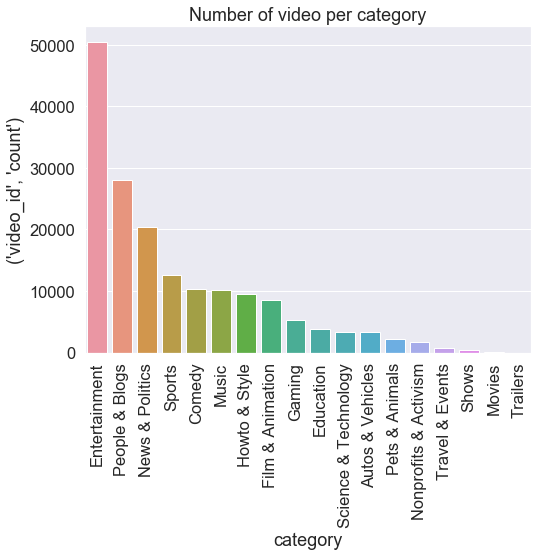

In [658]:
df1 = df.groupby(['category']).agg({'video_id':['count']})
df1 = df1.sort_values(('video_id', 'count'), ascending = False)
df1 = df1.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('video_id', 'count'), data = df1)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Number of video per category')

## A pie chart...

In [851]:
def other_in_pie(size, label):
    new_size = []
    new_label = []
    other = 0
    for i in range(len(size)):
        if i in range(0,9):
            new_size.append(size[i])
            new_label.append(label[i])
        else: other += size[i]
    new_size.append(other)
    new_label.append('others')
    return new_size, new_label

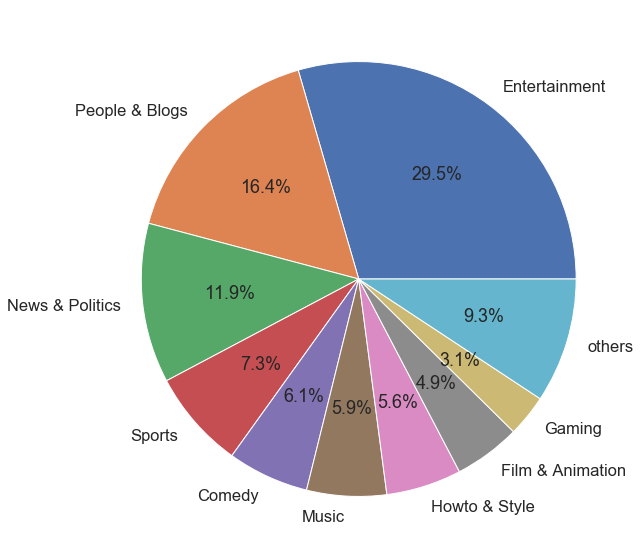

In [853]:
df_for_pie = df1
my_circle = plt.Circle( (0,0), 0.5, color='white')
size = df_for_pie[('video_id', 'count')]
labels = df_for_pie['category']
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.gca()
new_size = other_in_pie(size, labels)[0]
new_label = other_in_pie(size, labels)[1]
ax1.pie(new_size, labels = new_label, autopct='%1.1f%%')
plt.show() 

## What do people actually watch on Youtube?

Text(0.5, 1.0, 'Total views per category')

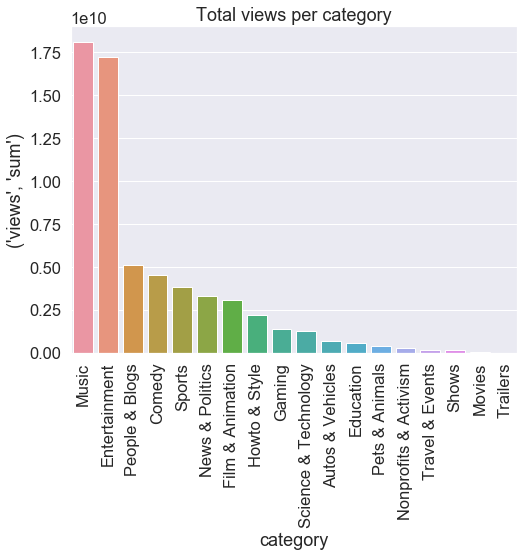

In [864]:
df_per_category = df.groupby(['category']).agg({'views':['sum']})
df_per_category = df_per_category.sort_values(('views', 'sum'), ascending = False)
df_per_category = df_per_category.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('views', 'sum'), data = df_per_category)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Total views per category')

## A look across the countries...

Text(0.5, 1, 'Total views per country and category')

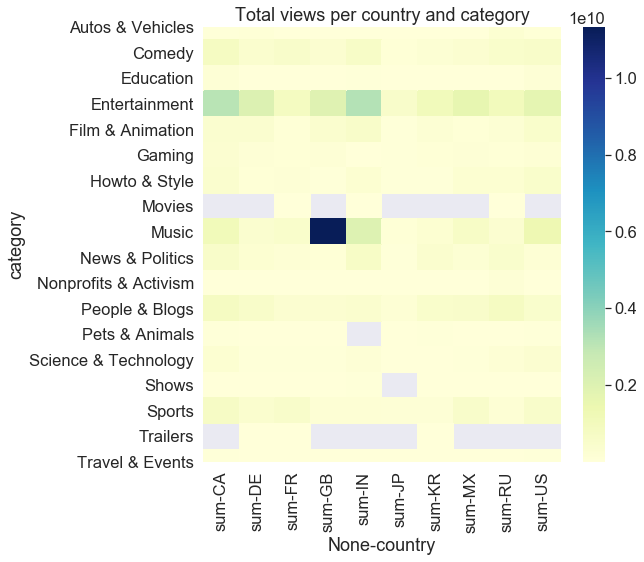

In [655]:
heat_view_data = df.groupby(['country', 'category']).agg({'views':['sum']})
heat_view_data = pd.pivot_table(heat_view_data, values='views', 
                     index=['category'], 
                     columns='country')
# heat_view = df.pivot("country","category","views")
# ax = sns.heatmap(heat_view_data, cmap="YlGnBu")
heat_view_no_gb = heat_view_data.drop([('sum', 'GB')], axis = 'columns')
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca()
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_view_data, cmap="YlGnBu")
ax.set_title('Total views per country and category')

Text(0.5, 1, 'Total views per country and category without GB')

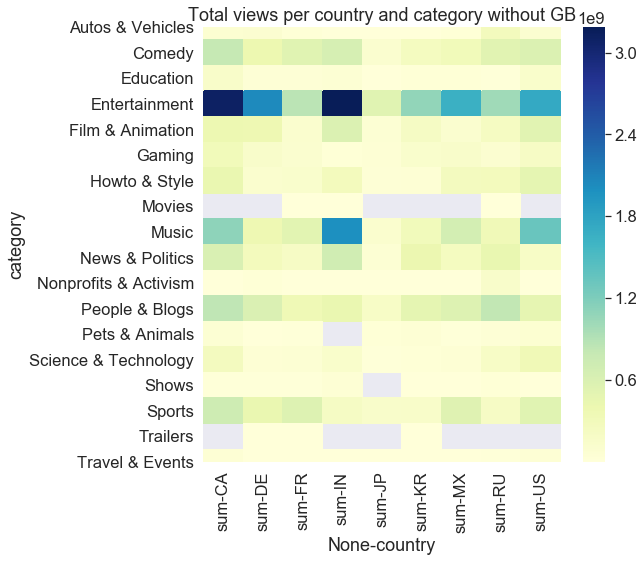

In [656]:
heat_view_no_gb = heat_view_data.drop([('sum', 'GB')], axis = 'columns')
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca()
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_view_no_gb, cmap="YlGnBu")
ax.set_title('Total views per country and category without GB')

## What to put in the user's tool bag 
### An example, the number of tag

In [666]:
def tag_count(tags):
    tot_tag = []
    for i in tags:
        i = i.split("|")
        tot_tag.append(i.index(i[-1])+1)
    return tot_tag

In [516]:
df['tags_number'] = tag_count(df[str('tags')])
tags_df = df[['video_id', 'tags_number', 'views', 'country', 'category']]
tags_df.head()

,video_id,tags_number,views,country,category
0,cJon8yBKv3g,44,19487,FR,Film & Animation
1,g12KeCPRB4Q,9,20744,FR,Gaming
2,irIZRH3JlIw,8,207452,FR,News & Politics
3,SnHtzkQZggA,22,15899,FR,Film & Animation
4,u6EoWM2KMPE,6,100607,FR,Comedy


Text(0.5, 1.0, 'Tag mean per category')

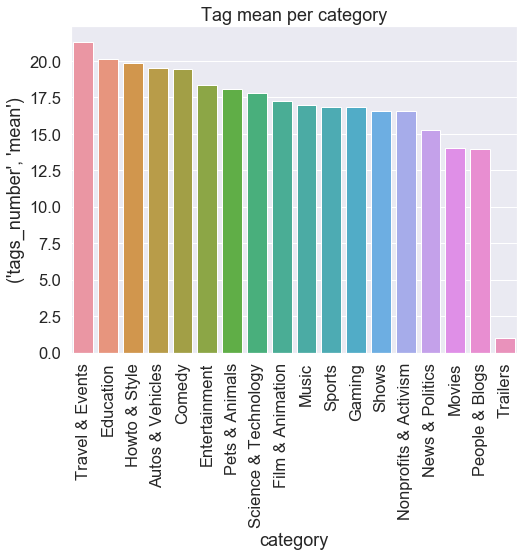

In [648]:
tags_df = df.groupby(['category']).agg({'tags_number': ['mean']})
tags_df = tags_df.sort_values(('tags_number', 'mean'), ascending = False)
tags_df = tags_df.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('tags_number', 'mean'), data = tags_df)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Tag mean per category')

## What can I expect in terms of views? 
### A new variable 'view_growth' to measure the difference between the last collection and the first one

In [909]:
df_all_timestamps['min_views'] = df_all_timestamps['views'].groupby(df_all_timestamps['video_id']).transform('min')
df_all_timestamps['max_views'] = df_all_timestamps['views'].groupby(df_all_timestamps['video_id']).transform('max')
df_all_timestamps['view_growth'] = df_all_timestamps['max_views'] - df_all_timestamps['min_views']
df_all = df_all_timestamps
#df_all = df_all_timestamps[df_all_timestamps['view_growth'] > 0]

Text(0.5, 1.0, 'Views growth mean per category')

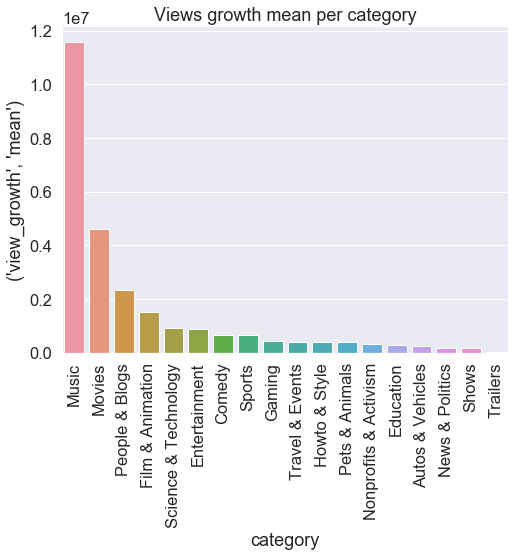

In [869]:
df_all = df_all.groupby(['category']).agg({'view_growth': ['mean']})
df_all = df_all.sort_values(('view_growth', 'mean'), ascending = False)
df_all = df_all.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('view_growth', 'mean'), data = df_all, ax = ax)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Views growth mean per category')

## A new variable 'engagement', adding up number of likes, dislikes and comment

In [644]:
df['engagement'] = df['likes'] + df['dislikes'] + df['comment_count']
engage_cat_df = df.groupby(['category']).agg({'engagement': ['mean']})
engage_cat_df.head()

,engagement
,mean
category,
Autos & Vehicles,9130.159133
Comedy,24188.797548
Education,6513.106749
Entertainment,11168.790778
Film & Animation,8768.875887


## a trivial regression...

Text(0.5, 1, 'Views by engagement')

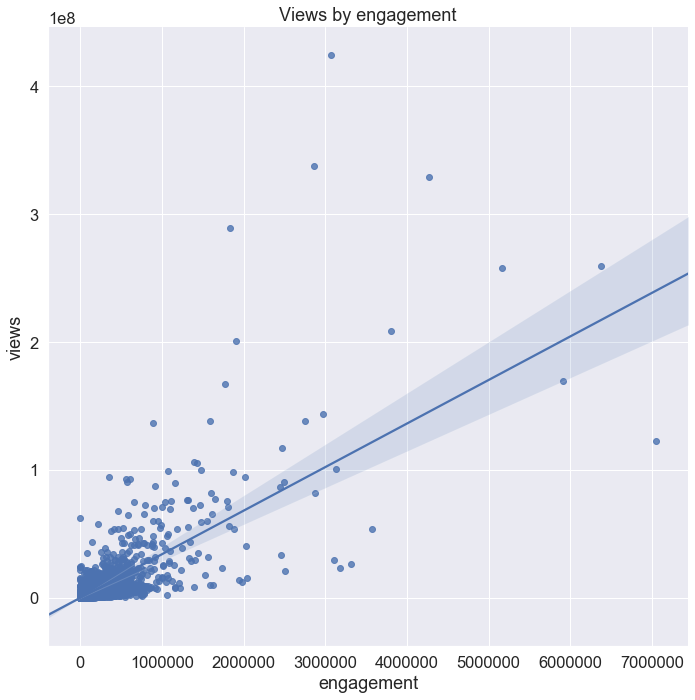

In [860]:
sns.lmplot(x = 'engagement', y = 'views', data = df, height = 10)
ax = plt.gca()
ax.set_title('Views by engagement')

## What about countries?

Text(0.5, 1, 'Views by engagement and country')

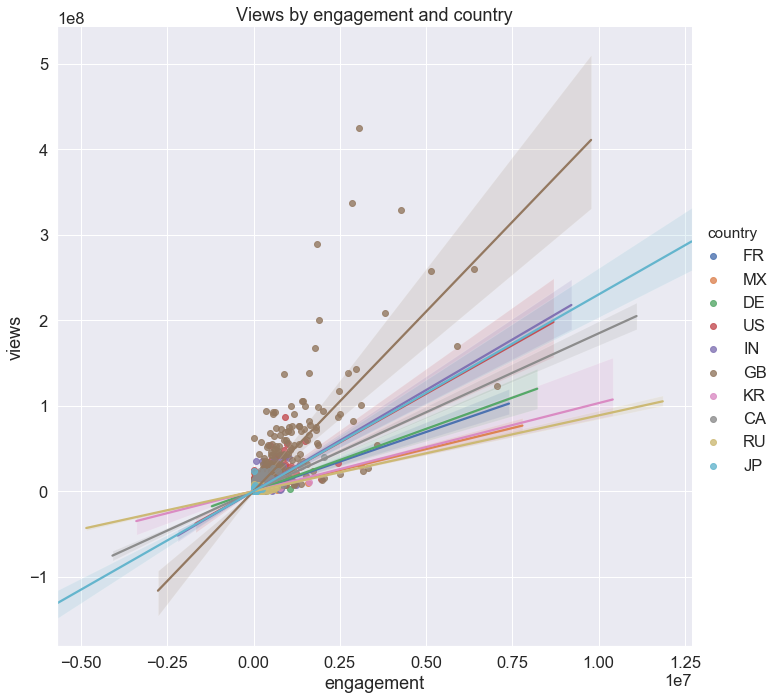

In [859]:
sns.lmplot(x = 'engagement', y = 'views', hue = 'country', data = df, height = 10)
ax = plt.gca()
ax.set_title('Views by engagement and country')

## Number of dislike to expect from my video

Text(0.5, 1.0, 'Dislike mean per category')

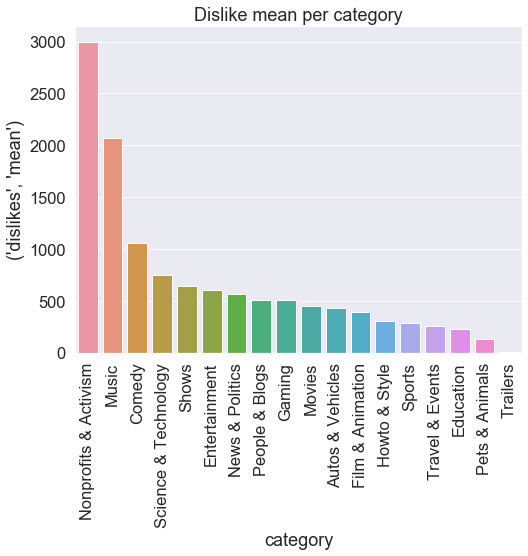

In [874]:
dislike_cat_df = df.groupby(['category']).agg({'dislikes': ['mean']})
dislike_cat_df = dislike_cat_df.sort_values(('dislikes', 'mean'), ascending = False)
dislike_cat_df = dislike_cat_df.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('dislikes', 'mean'), data = dislike_cat_df)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Dislike mean per category')

## Number of like to expect from my video

Text(0.5, 1.0, 'Like mean per category')

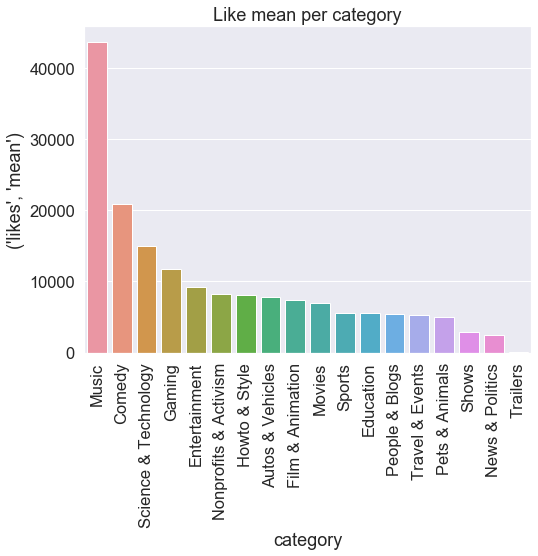

In [873]:
like_cat_df = df.groupby(['category']).agg({'likes': ['mean']})
like_cat_df = like_cat_df.sort_values(('likes', 'mean'), ascending = False)
like_cat_df = like_cat_df.reset_index()
fig = plt.figure(figsize=(8,6)) 
ax = fig.gca()
sns.barplot(x = 'category', y = ('likes', 'mean'), data = like_cat_df)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
ax.set_title('Like mean per category')